In [28]:
!pip install darts
!pip install xgboost

        waktu  DAIHATSU    HONDA  MITSUBISHI  SUZUKI   TOYOTA
0  2021-01-01    8993.0   7231.0      9108.0  6400.0  15474.0
1  2021-02-01    9412.0   6812.0      7567.0  4600.0  14645.0
2  2021-03-01   16770.0  11350.0     13088.0  8669.0  26034.0
3  2021-04-01   15861.0   8474.0     13820.0  8100.0  22618.0
4  2021-05-01    8310.0   5832.0     10160.0  5341.0  17361.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waktu       54 non-null     object 
 1   DAIHATSU    54 non-null     float64
 2   HONDA       54 non-null     float64
 3   MITSUBISHI  54 non-null     float64
 4   SUZUKI      54 non-null     float64
 5   TOYOTA      54 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


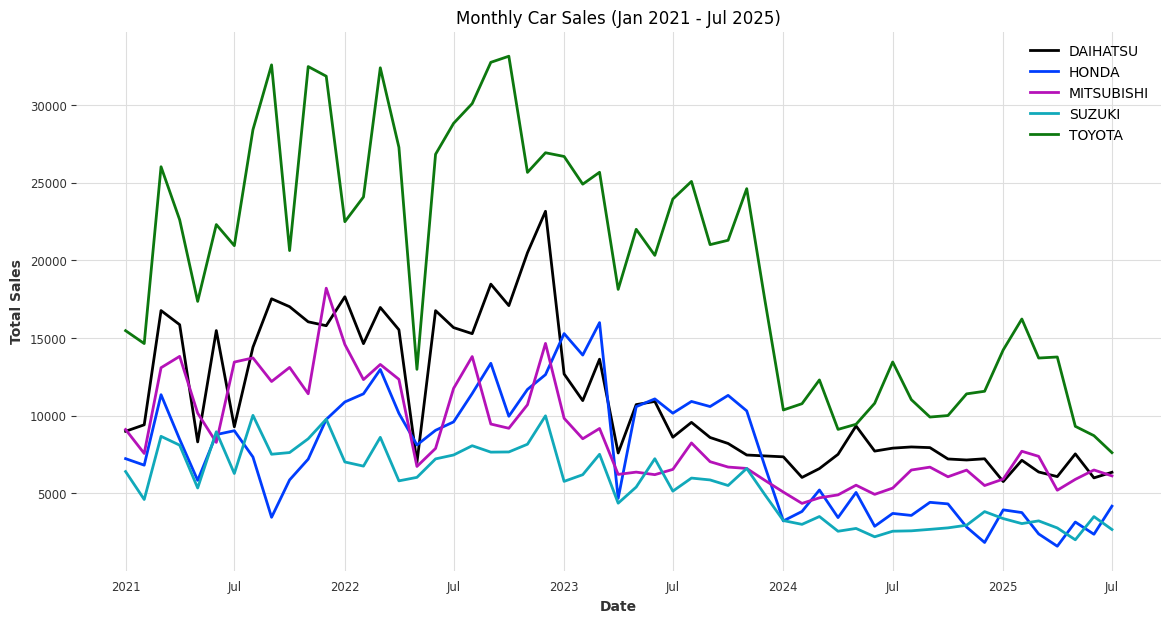

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import make_scorer

df = pd.read_csv("/kaggle/input/datacarsalegaikindo2021-2025/dataCarSale2021-2025.csv")
print(df.head())
df.info()

df['waktu'] = pd.to_datetime(df['waktu'])
df.set_index('waktu', inplace = True)

full_date = pd.date_range(start = df.index.min(), end = df.index.max(), freq="MS")
df = df.reindex(full_date)

df = df.interpolate(method = "linear")

series = TimeSeries.from_dataframe(df, freq='MS')

plt.figure(figsize=(14, 7))
series.plot()
plt.title('Monthly Car Sales (Jan 2021 - Jul 2025)')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [30]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    epsilon = 1e-9
    return np.mean(numerator / (denominator + epsilon)) * 100

In [31]:
df = df.reset_index().rename(columns={'index': 'waktu'})
df = df.melt(id_vars='waktu', var_name='Brand', value_name='Sales')

df_ext = pd.read_csv("/kaggle/input/datacarsalegaikindo2021-2025/extFeat.csv")
df_ext['waktu'] = pd.to_datetime(df_ext['waktu'])
df_long = pd.merge(df, df_ext, on='waktu', how='left')

/tmp/ipykernel_36/2100284988.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_lgbm['Brand'] = X_train_lgbm['Brand'].astype('category')
/tmp/ipykernel_36/2100284988.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_lgbm['Brand'] = X_test_lgbm['Brand'].astype('category')



--- Fold 1 Results ---
  - SMAPE for DAIHATSU: 14.40%
  - SMAPE for HONDA: 15.80%
  - Overall SMAPE for Fold 1: 15.59%


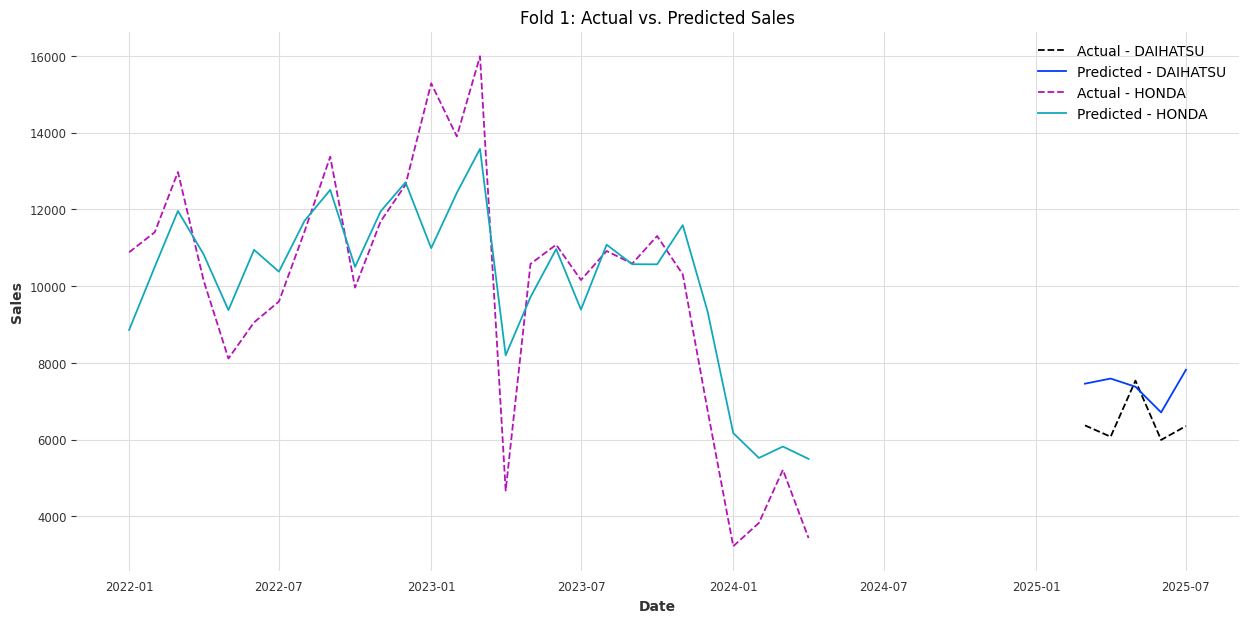

/tmp/ipykernel_36/2100284988.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_lgbm['Brand'] = X_train_lgbm['Brand'].astype('category')
/tmp/ipykernel_36/2100284988.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_lgbm['Brand'] = X_test_lgbm['Brand'].astype('category')



--- Fold 2 Results ---
  - SMAPE for HONDA: 23.05%
  - SMAPE for MITSUBISHI: 9.15%
  - Overall SMAPE for Fold 2: 15.47%


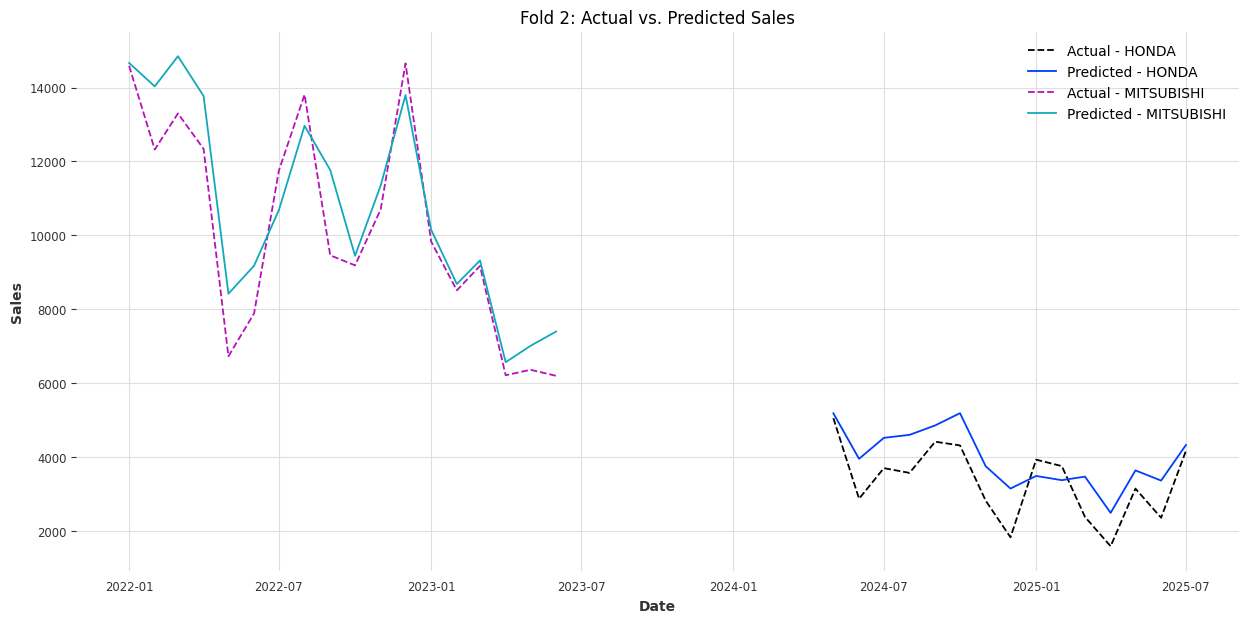

/tmp/ipykernel_36/2100284988.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_lgbm['Brand'] = X_train_lgbm['Brand'].astype('category')
/tmp/ipykernel_36/2100284988.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_lgbm['Brand'] = X_test_lgbm['Brand'].astype('category')



--- Fold 3 Results ---
  - SMAPE for MITSUBISHI: 10.56%
  - SMAPE for SUZUKI: 9.08%
  - Overall SMAPE for Fold 3: 10.20%


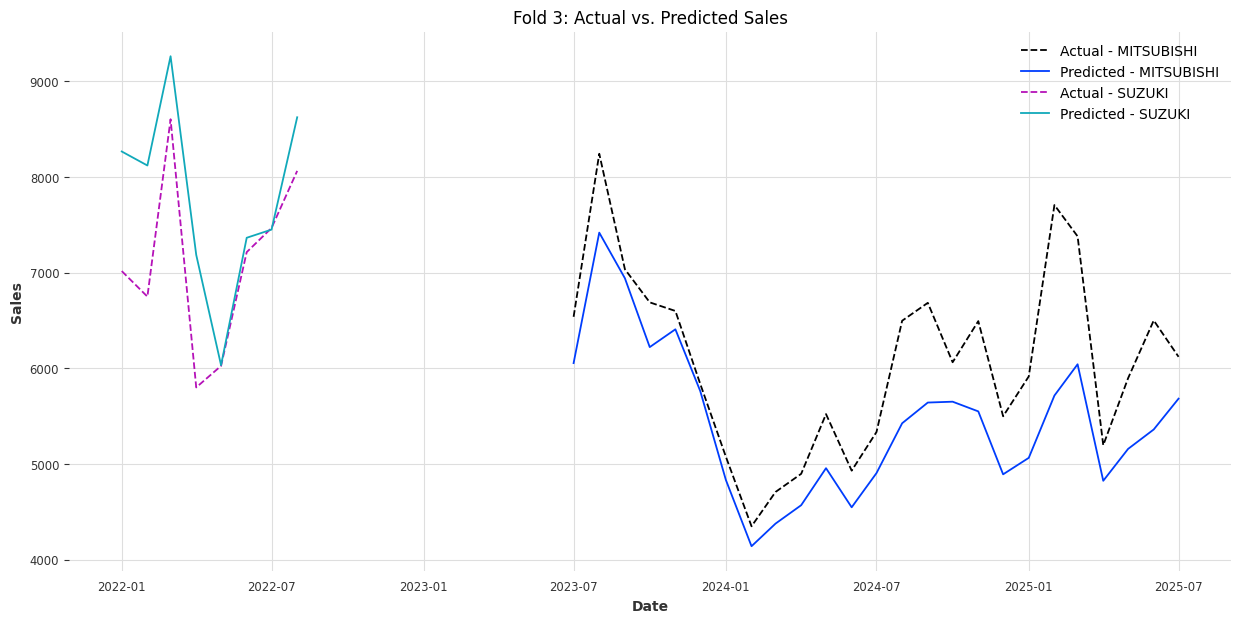

/tmp/ipykernel_36/2100284988.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_lgbm['Brand'] = X_train_lgbm['Brand'].astype('category')
/tmp/ipykernel_36/2100284988.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_lgbm['Brand'] = X_test_lgbm['Brand'].astype('category')



--- Fold 4 Results ---
  - SMAPE for SUZUKI: 6.61%
  - Overall SMAPE for Fold 4: 6.61%


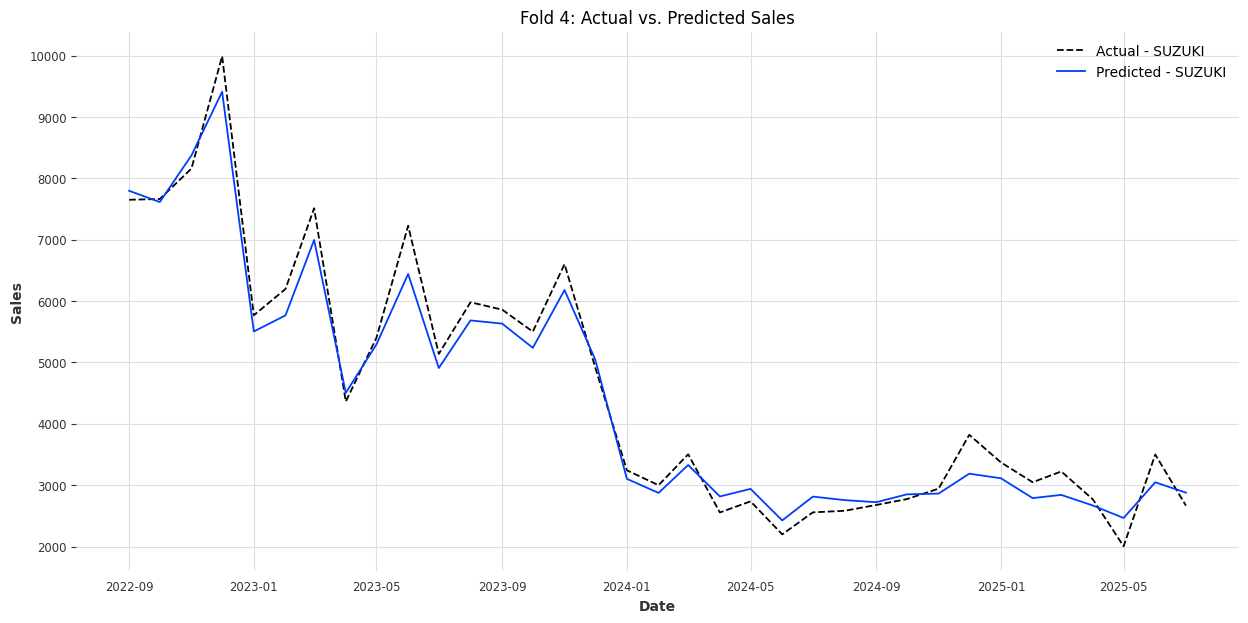

/tmp/ipykernel_36/2100284988.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_lgbm['Brand'] = X_train_lgbm['Brand'].astype('category')
/tmp/ipykernel_36/2100284988.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_lgbm['Brand'] = X_test_lgbm['Brand'].astype('category')



--- Fold 5 Results ---
  - SMAPE for TOYOTA: 7.82%
  - Overall SMAPE for Fold 5: 7.82%


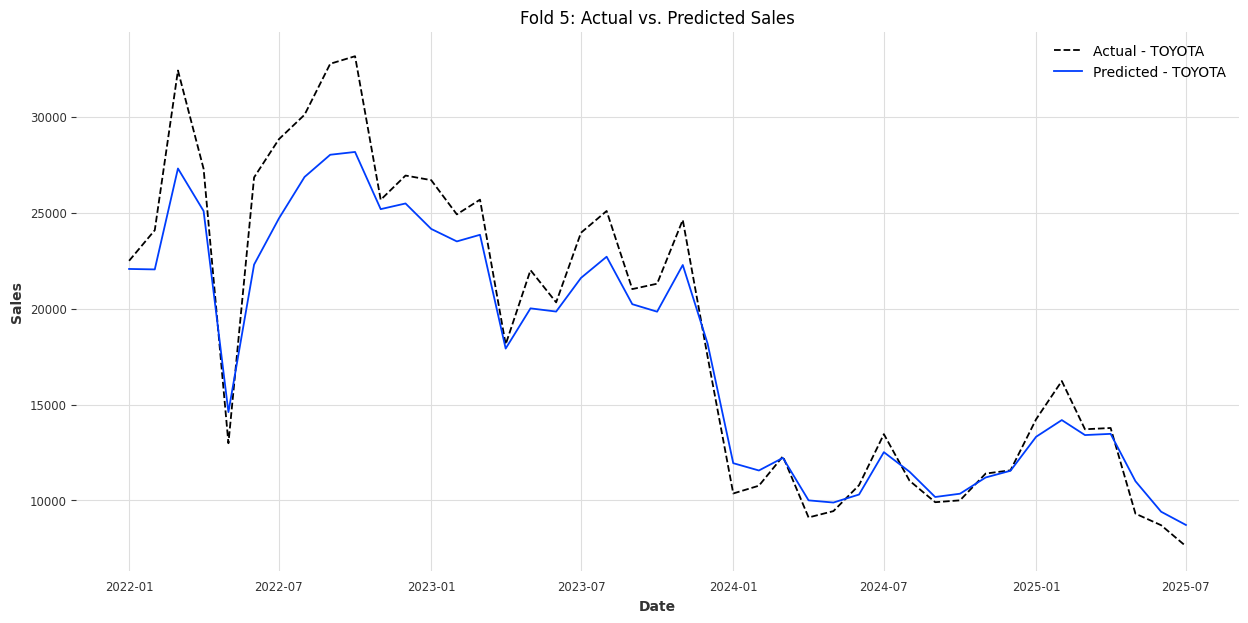

Average SMAPE for DAIHATSU: 14.40%
Average SMAPE for HONDA: 19.42%
Average SMAPE for MITSUBISHI: 9.86%
Average SMAPE for SUZUKI: 7.84%
Average SMAPE for TOYOTA: 7.82%

Overall Average SMAPE for Ensemble Model: 11.14%


In [32]:
FEATURES = [
    'month', 'year', 'dayofweek', 'quarter', 'dayofyear',
    'sales_lag_1', 'sales_lag_2', 'sales_lag_3', 'sales_lag_12',
    'sales_rolling_mean_3', 'sales_rolling_std_3',
    'sales_rolling_mean_6', 'sales_rolling_std_6',
    'bi_rate', 'IKK', 'inflasi_bulanan', 'ritel_yoy', 'kredit_konsumen'
]
TARGET = 'Sales'

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

brand_scores = {brand: [] for brand in df_long['Brand'].unique()}
overall_scores = []
fold_number = 1

for train_index, test_index in tscv.split(df_long):
    train_fold = df_long.iloc[train_index].copy()
    test_fold = df_long.iloc[test_index].copy()

    def create_features(df):
        df_copy = df.copy()
        df_copy['month'] = df_copy['waktu'].dt.month
        df_copy['year'] = df_copy['waktu'].dt.year
        df_copy['dayofweek'] = df_copy['waktu'].dt.dayofweek
        df_copy['quarter'] = df_copy['waktu'].dt.quarter
        df_copy['dayofyear'] = df_copy['waktu'].dt.dayofyear
        
        df_copy = df_copy.sort_values(by=['Brand', 'waktu'])
        lags = [1, 2, 3, 12]
        for lag in lags:
            df_copy[f'sales_lag_{lag}'] = df_copy.groupby('Brand')['Sales'].shift(lag)
            
        window_sizes = [3, 6]
        for window in window_sizes:
            df_copy[f'sales_rolling_mean_{window}'] = df_copy.groupby('Brand')['Sales'].rolling(window=window).mean().reset_index(level=0, drop=True)
            df_copy[f'sales_rolling_std_{window}'] = df_copy.groupby('Brand')['Sales'].rolling(window=window).std().reset_index(level=0, drop=True)
        return df_copy

    train_featured = create_features(train_fold)
    
    combined_fold = pd.concat([train_fold.tail(12), test_fold], ignore_index=True)
    test_featured = create_features(combined_fold)
    
    train_final = train_featured.dropna()
    test_final = test_featured.dropna()
    
    # FEATURES = [col for col in train_final.columns if col not in ['waktu', 'Sales']]
    
    # LightGBM
    # lgbm_features = [f for f in FEATURES if f != 'Brand'] + ['Brand']
    lgbm_features = FEATURES + ['Brand']
    X_train_lgbm = train_final[lgbm_features]; y_train_lgbm = train_final[TARGET]
    X_test_lgbm = test_final[lgbm_features]
    X_train_lgbm['Brand'] = X_train_lgbm['Brand'].astype('category')
    X_test_lgbm['Brand'] = X_test_lgbm['Brand'].astype('category')
    lgbm = lgb.LGBMRegressor(random_state=42, verbosity=-1); lgbm.fit(X_train_lgbm, y_train_lgbm)
    preds_lgbm = lgbm.predict(X_test_lgbm)

    combined_for_ridge = pd.concat([train_final, test_final])
    combined_encoded = pd.get_dummies(combined_for_ridge, columns=['Brand'], drop_first=True)
    
    # Ridge
    train_encoded = combined_encoded.iloc[:len(train_final)]
    test_encoded = combined_encoded.iloc[len(train_final):]
    
    brand_cols = [c for c in train_encoded if 'Brand_' in c]
    # ridge_features = [f for f in FEATURES if f != 'Brand'] + brand_cols
    ridge_features = FEATURES + brand_cols
    
    X_train_ridge = train_encoded[ridge_features]; y_train_ridge = train_encoded[TARGET]
    X_test_ridge = test_encoded[ridge_features]
    
    scaler = StandardScaler(); 
    X_train_scaled = scaler.fit_transform(X_train_ridge); X_test_scaled = scaler.transform(X_test_ridge)
    ridge = Ridge(random_state=42); ridge.fit(X_train_scaled, y_train_ridge)
    preds_ridge = ridge.predict(X_test_scaled)
    
    # Ensemble
    ensemble_preds = 0.8 * preds_ridge + 0.2 * preds_lgbm

    # Evaluation
    results_df = pd.DataFrame({
        'waktu': test_final['waktu'],
        'Brand': test_final['Brand'],
        'Actuals': test_final[TARGET],
        'Predictions': ensemble_preds
    })

    print(f"\n--- Fold {fold_number} Results ---")
    for brand_name in results_df['Brand'].unique():
        brand_df = results_df[results_df['Brand'] == brand_name]
        brand_smape = smape(brand_df['Actuals'], brand_df['Predictions'])
        brand_scores[brand_name].append(brand_smape)
        print(f"  - SMAPE for {brand_name}: {brand_smape:.2f}%")
    
    overall_fold_score = smape(results_df['Actuals'], results_df['Predictions'])
    overall_scores.append(overall_fold_score)
    print(f"  - Overall SMAPE for Fold {fold_number}: {overall_fold_score:.2f}%")

    # Visualization
    plt.figure(figsize=(15, 7))
    for brand in results_df['Brand'].unique():
        plot_df = results_df[results_df['Brand'] == brand]
        plt.plot(plot_df['waktu'], plot_df['Actuals'], '--', label=f'Actual - {brand}')
        plt.plot(plot_df['waktu'], plot_df['Predictions'], '-', label=f'Predicted - {brand}')
    
    plt.title(f'Fold {fold_number}: Actual vs. Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    fold_number += 1

for brand_name, scores in brand_scores.items():
    print(f"Average SMAPE for {brand_name}: {np.mean(scores):.2f}%")

print(f"\nOverall Average SMAPE for Ensemble Model: {np.mean(overall_scores):.2f}%")